In [1]:
from nfw_project import config_paths as cfg
import geopandas as gpd
import pandas as pd
import numpy as np

from docx import Document
from docx.shared import Inches

import xml.etree.ElementTree as ET
from pathlib import Path

# Roadless Area Metadata

In [12]:
# ---------------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------------
METADATA_XML = Path(cfg.RAW_DIR / "S_USA.RoadlessArea_2001_metadata.xml")
MD_OUT  = Path(cfg.LOGS_OUTPUT_DIR / "Roadless_Area_META.md")

# ---------------------------------------------------------------------
# LOAD XML
# ---------------------------------------------------------------------
tree = ET.parse(METADATA_XML)
root = tree.getroot()

def find_text(tag):
    """Return first occurrence of tag anywhere in the XML."""
    elem = root.find(f".//{tag}")
    return elem.text.strip() if elem is not None and elem.text else ""

# ---------------------------------------------------------------------
# HIGH-LEVEL METADATA
# ---------------------------------------------------------------------
metadata_info = {
    "Title":          find_text("title"),
    "Abstract":       find_text("abstract"),
    "Purpose":        find_text("purpose"),
    "Begin Date":     find_text("begdate"),
    "End Date":       find_text("enddate"),
    "West Boundary":  find_text("westbc"),
    "East Boundary":  find_text("eastbc"),
    "South Boundary": find_text("southbc"),
    "North Boundary": find_text("northbc"),
}

# ---------------------------------------------------------------------
# ATTRIBUTE DICTIONARY
# ---------------------------------------------------------------------
attributes = []

for attr in root.findall(".//attr"):
    name = attr.findtext("attrlabl", "").strip()
    desc = (attr.findtext("attrdef", "") or "").strip().replace("\n", " ")
    src  = attr.findtext("attrdefs", "").strip()

    if not name:
        continue

    attributes.append({"Field": name, "Description": desc, "Source": src})



# ---------------------------------------------------------------------
# ENUMERATED DOMAINS (edomv / edomvd / edomvds)
# ---------------------------------------------------------------------
enum_domains = {}  # attr name -> list of {Code, Description, Source}

for attr in root.findall(".//attr"):
    attr_name = attr.findtext("attrlabl", "").strip()
    domv = attr.find("attrdomv")
    if not attr_name or domv is None:
        continue

    for edom in domv.findall("edom"):
        code = (edom.findtext("edomv") or "").strip()
        desc = (edom.findtext("edomvd") or "").strip().replace("\n", " ")
        src  = (edom.findtext("edomvds") or "").strip()

        if not code:
            continue

        enum_domains.setdefault(attr_name, []).append(
            {"Code": code, "Description": desc, "Source": src}
        )

# ---------------------------------------------------------------------
# BUILD  MARKDOWN DOC
# ---------------------------------------------------------------------
md_lines = []

# Header
md_lines.append("# Roadless Area Metadata")
md_lines.append("")

# Dataset overview
md_lines.append("## Dataset Overview\n")
for k, v in metadata_info.items():
    md_lines.append(f"**{k}:** {v if v else ''}")
    md_lines.append("")
md_lines.append("---\n")

# Attribute dictionary
md_lines.append("## Attribute Dictionary\n")
md_lines.append("| Field | Description | Source |")
md_lines.append("|-------|-------------|--------|")

for row in attributes:
    fld  = row["Field"].replace("|", "\\|")
    desc = row["Description"].replace("|", "\\|")
    src  = row["Source"].replace("|", "\\|")
    md_lines.append(f"| {fld} | {desc} | {src} |")

# Enumerated domains section (only if any exist)
if enum_domains:
    md_lines.append("\n---\n")
    md_lines.append("## Enumerated Domains\n")

    for attr_name, values in enum_domains.items():
        md_lines.append(f"\n### {attr_name}\n")
        md_lines.append("| Code | Description | Source |")
        md_lines.append("|------|-------------|--------|")
        for v in values:
            code = v["Code"].replace("|", "\\|")
            desc = v["Description"].replace("|", "\\|")
            src  = v["Source"].replace("|", "\\|")
            md_lines.append(f"| {code} | {desc} | {src} |")

# Write final Markdown
with MD_OUT.open("w", encoding="utf-8") as f:
    f.write("\n".join(md_lines) + "\n")

print(f"Markdown written to: {MD_OUT.resolve()}")


Markdown written to: C:\Users\bsf31\Documents\github\NFW-ROADLESS-RULE-ANALYSIS\05-outputs\logs\Roadless_Area_META.md


# National Forest System Roads Metadata

In [13]:
# ---------------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------------
METADATA_XML = Path(cfg.RAW_DIR / "Trans_RoadCore_FS.xml")
MD_OUT  = Path(cfg.LOGS_OUTPUT_DIR / "NFSR_META.md")

# ---------------------------------------------------------------------
# LOAD XML
# ---------------------------------------------------------------------
tree = ET.parse(METADATA_XML)
root = tree.getroot()

def find_text(tag):
    """Return first occurrence of tag anywhere in the XML."""
    elem = root.find(f".//{tag}")
    return elem.text.strip() if elem is not None and elem.text else ""

# ---------------------------------------------------------------------
# HIGH-LEVEL METADATA
# ---------------------------------------------------------------------
metadata_info = {
    "Title":          find_text("title"),
    "Abstract":       find_text("abstract"),
    "Purpose":        find_text("purpose"),
    "Begin Date":     find_text("begdate"),
    "End Date":       find_text("enddate"),
    "West Boundary":  find_text("westbc"),
    "East Boundary":  find_text("eastbc"),
    "South Boundary": find_text("southbc"),
    "North Boundary": find_text("northbc"),
}

# ---------------------------------------------------------------------
# ATTRIBUTE DICTIONARY
# ---------------------------------------------------------------------
attributes = []

for attr in root.findall(".//attr"):
    name = attr.findtext("attrlabl", "").strip()
    desc = (attr.findtext("attrdef", "") or "").strip().replace("\n", " ")
    src  = attr.findtext("attrdefs", "").strip()

    if not name:
        continue

    attributes.append({"Field": name, "Description": desc, "Source": src})



# ---------------------------------------------------------------------
# ENUMERATED DOMAINS (edomv / edomvd / edomvds)
# ---------------------------------------------------------------------
enum_domains = {}  # attr name -> list of {Code, Description, Source}

for attr in root.findall(".//attr"):
    attr_name = attr.findtext("attrlabl", "").strip()
    domv = attr.find("attrdomv")
    if not attr_name or domv is None:
        continue

    for edom in domv.findall("edom"):
        code = (edom.findtext("edomv") or "").strip()
        desc = (edom.findtext("edomvd") or "").strip().replace("\n", " ")
        src  = (edom.findtext("edomvds") or "").strip()

        if not code:
            continue

        enum_domains.setdefault(attr_name, []).append(
            {"Code": code, "Description": desc, "Source": src}
        )

# ---------------------------------------------------------------------
# BUILD  MARKDOWN DOC
# ---------------------------------------------------------------------
md_lines = []

# Header
md_lines.append("# NFSR Metadata")
md_lines.append("")

# Dataset overview
md_lines.append("## Dataset Overview\n")
for k, v in metadata_info.items():
    md_lines.append(f"**{k}:** {v if v else ''}")
    md_lines.append("")
md_lines.append("---\n")

# Attribute dictionary
md_lines.append("## Attribute Dictionary\n")
md_lines.append("| Field | Description | Source |")
md_lines.append("|-------|-------------|--------|")

for row in attributes:
    fld  = row["Field"].replace("|", "\\|")
    desc = row["Description"].replace("|", "\\|")
    src  = row["Source"].replace("|", "\\|")
    md_lines.append(f"| {fld} | {desc} | {src} |")

# Enumerated domains section (only if any exist)
if enum_domains:
    md_lines.append("\n---\n")
    md_lines.append("## Enumerated Domains\n")

    for attr_name, values in enum_domains.items():
        md_lines.append(f"\n### {attr_name}\n")
        md_lines.append("| Code | Description | Source |")
        md_lines.append("|------|-------------|--------|")
        for v in values:
            code = v["Code"].replace("|", "\\|")
            desc = v["Description"].replace("|", "\\|")
            src  = v["Source"].replace("|", "\\|")
            md_lines.append(f"| {code} | {desc} | {src} |")

# Write final Markdown
with MD_OUT.open("w", encoding="utf-8") as f:
    f.write("\n".join(md_lines) + "\n")

print(f"Markdown written to: {MD_OUT.resolve()}")


Markdown written to: C:\Users\bsf31\Documents\github\NFW-ROADLESS-RULE-ANALYSIS\05-outputs\logs\NFSR_META.md


# USFS National Forest Boundaries

In [14]:
# ---------------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------------
METADATA_XML = Path(cfg.RAW_DIR / "BdyAdm_LSRS_AdministrativeForest.xml")
MD_OUT  = Path(cfg.LOGS_OUTPUT_DIR / "AdministrativeForest_META.md")

# ---------------------------------------------------------------------
# LOAD XML
# ---------------------------------------------------------------------
tree = ET.parse(METADATA_XML)
root = tree.getroot()

def find_text(tag):
    """Return first occurrence of tag anywhere in the XML."""
    elem = root.find(f".//{tag}")
    return elem.text.strip() if elem is not None and elem.text else ""

# ---------------------------------------------------------------------
# HIGH-LEVEL METADATA
# ---------------------------------------------------------------------
metadata_info = {
    "Title":          find_text("title"),
    "Abstract":       find_text("abstract"),
    "Purpose":        find_text("purpose"),
    "Begin Date":     find_text("begdate"),
    "End Date":       find_text("enddate"),
    "West Boundary":  find_text("westbc"),
    "East Boundary":  find_text("eastbc"),
    "South Boundary": find_text("southbc"),
    "North Boundary": find_text("northbc"),
}

# ---------------------------------------------------------------------
# ATTRIBUTE DICTIONARY
# ---------------------------------------------------------------------
attributes = []

for attr in root.findall(".//attr"):
    name = attr.findtext("attrlabl", "").strip()
    desc = (attr.findtext("attrdef", "") or "").strip().replace("\n", " ")
    src  = attr.findtext("attrdefs", "").strip()

    if not name:
        continue

    attributes.append({"Field": name, "Description": desc, "Source": src})



# ---------------------------------------------------------------------
# ENUMERATED DOMAINS (edomv / edomvd / edomvds)
# ---------------------------------------------------------------------
enum_domains = {}  # attr name -> list of {Code, Description, Source}

for attr in root.findall(".//attr"):
    attr_name = attr.findtext("attrlabl", "").strip()
    domv = attr.find("attrdomv")
    if not attr_name or domv is None:
        continue

    for edom in domv.findall("edom"):
        code = (edom.findtext("edomv") or "").strip()
        desc = (edom.findtext("edomvd") or "").strip().replace("\n", " ")
        src  = (edom.findtext("edomvds") or "").strip()

        if not code:
            continue

        enum_domains.setdefault(attr_name, []).append(
            {"Code": code, "Description": desc, "Source": src}
        )

# ---------------------------------------------------------------------
# BUILD  MARKDOWN DOC
# ---------------------------------------------------------------------
md_lines = []

# Header
md_lines.append("# Administrative Forest Metadata")
md_lines.append("")

# Dataset overview
md_lines.append("## Dataset Overview\n")
for k, v in metadata_info.items():
    md_lines.append(f"**{k}:** {v if v else ''}")
    md_lines.append("")
md_lines.append("---\n")

# Attribute dictionary
md_lines.append("## Attribute Dictionary\n")
md_lines.append("| Field | Description | Source |")
md_lines.append("|-------|-------------|--------|")

for row in attributes:
    fld  = row["Field"].replace("|", "\\|")
    desc = row["Description"].replace("|", "\\|")
    src  = row["Source"].replace("|", "\\|")
    md_lines.append(f"| {fld} | {desc} | {src} |")

# Enumerated domains section (only if any exist)
if enum_domains:
    md_lines.append("\n---\n")
    md_lines.append("## Enumerated Domains\n")

    for attr_name, values in enum_domains.items():
        md_lines.append(f"\n### {attr_name}\n")
        md_lines.append("| Code | Description | Source |")
        md_lines.append("|------|-------------|--------|")
        for v in values:
            code = v["Code"].replace("|", "\\|")
            desc = v["Description"].replace("|", "\\|")
            src  = v["Source"].replace("|", "\\|")
            md_lines.append(f"| {code} | {desc} | {src} |")

# Write final Markdown
with MD_OUT.open("w", encoding="utf-8") as f:
    f.write("\n".join(md_lines) + "\n")

print(f"Markdown written to: {MD_OUT.resolve()}")


Markdown written to: C:\Users\bsf31\Documents\github\NFW-ROADLESS-RULE-ANALYSIS\05-outputs\logs\AdministrativeForest_META.md


# Roads – Attribute Table


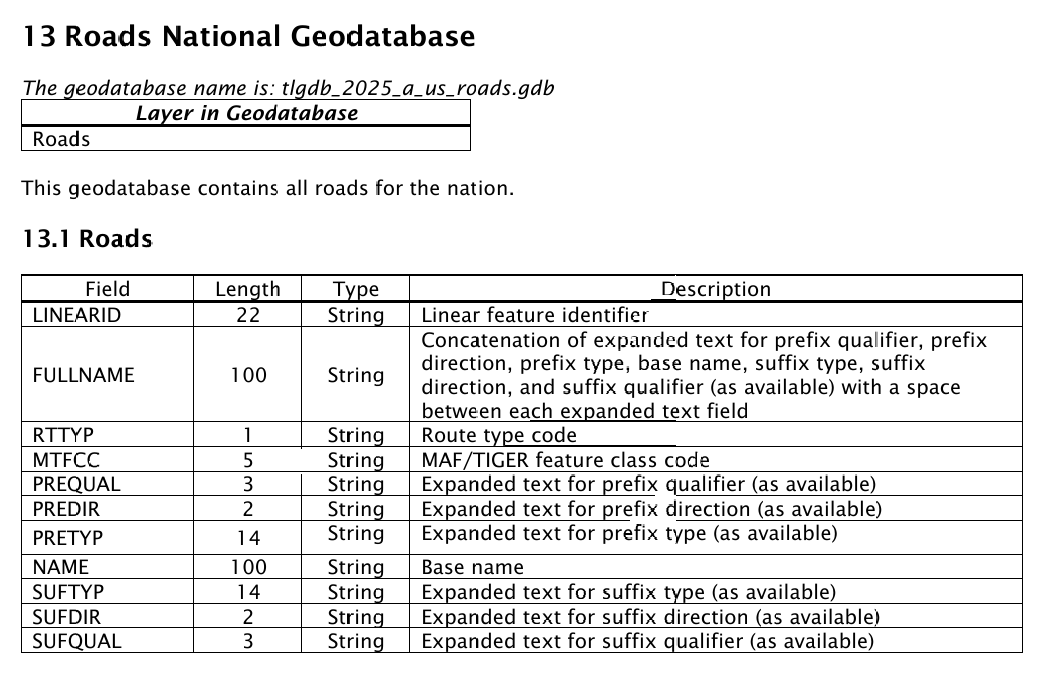
| Field     | Length | Type   | Description                                                                                                                                                  |
|-----------|--------|--------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LINEARID  | 22     | String | Linear feature identifier                                                                                                                                     |
| FULLNAME  | 100    | String | Concatenation of expanded text for prefix qualifier, prefix direction, prefix type, base name, suffix type, suffix direction, and suffix qualifier (as available) with a space between each expanded text field |
| RTTYP     | 1      | String | Route type code                                                                                                                                               |
| MTFCC     | 5      | String | MAF/TIGER feature class code                                                                                                                                  |
| PREQUAL   | 3      | String | Expanded text for prefix qualifier (as available)                                                                                                             |
| PREDIR    | 2      | String | Expanded text for prefix direction (as available)                                                                                                             |
| PRETYP    | 14     | String | Expanded text for prefix type (as available)                                                                                                                  |
| NAME      | 100    | String | Base name                                                                                                                                                     |
| SUFTYP    | 14     | String | Expanded text for suffix type (as available)                                                                                                                  |
| SUFDIR    | 2      | String | Expanded text for suffix direction (as available)                                                                                                             |
| SUFQUAL   | 3      | String | Expanded text for suffix qualifier (as available)                                                                                                             |


# Geopandas Inspection

In [11]:
roadless = gpd.read_file(cfg.USFS_GPKG, layer='roadless_area')
usfs_admin_boundary = gpd.read_file(cfg.USFS_GPKG, layer="forest_admin_boundary")


In [11]:
roadless.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Reproject to an equal-area CRS in meters EPSG:5070

In [ ]:

roadless_5070 = roadless.to_crs("EPSG:5070")
usfs_admin_boundary_5070 = usfs_admin_boundary.to_crs("EPSG:5070")

In [8]:

# ---- BASIC COUNTS ----
total_rows = len(roadless_5070)
by_state  = roadless_5070.groupby("STATE").size().sort_values(ascending=False)
by_region = roadless_5070.groupby("REGION").size()
by_forest = roadless_5070.groupby("FOREST").size()

# ---- ACRES SUMMARY ----
acres_summary = roadless_5070["ACRES"].describe()  # count, mean, std, min, quartiles, max
total_acres = roadless_5070["ACRES"].sum()

acres_by_state = roadless_5070.groupby("STATE")["ACRES"].sum().sort_values(ascending=False)
acres_by_region = roadless_5070.groupby("REGION")["ACRES"].sum()
acres_by_category = roadless_5070.groupby("CATEGORY")["ACRES"].sum()

# ---- MISSING VALUES ----
missing = roadless_5070.isna().sum()

# ---- Duplicates check ----
dupes = roadless_5070[roadless_5070.duplicated(subset=["NAME", "FOREST"], keep=False)]

# ---- Geometry summary (optional) ----
area_summary = roadless_5070["SHAPE_AREA"].describe()
length_summary = roadless_5070["SHAPE_LEN"].describe()

inventory = {
    "total_rows": total_rows,
    "total_acres": total_acres,
    "acres_summary": acres_summary,
    "rows_by_state": by_state,
    "rows_by_region": by_region,
    "rows_by_forest": by_forest,
    "acres_by_state": acres_by_state,
    "acres_by_region": acres_by_region,
    "acres_by_category": acres_by_category,
    "missing_values": missing,
    "duplicate_names": dupes
}

inventory

{'total_rows': 11391,
 'total_acres': np.float64(58419694.38237882),
 'acres_summary': count    1.139100e+04
 mean     5.128583e+03
 std      2.288883e+04
 min      1.026139e-02
 25%      5.334073e+01
 50%      4.563857e+02
 75%      3.753757e+03
 max      1.160365e+06
 Name: ACRES, dtype: float64,
 'rows_by_state': STATE
 ID    1844
 CA    1791
 AK    1387
 MT    1214
 CO     951
 OR     913
 WA     821
 UT     632
 NV     364
 WY     342
 NM     233
 VA     176
 AZ     155
 NH      97
 GA      73
 NC      68
 TN      62
 WV      34
 MN      33
 AR      30
 ND      23
 WI      22
 VT      19
 IL      13
 PR      12
 PA       9
 FL       9
 ME       9
 SD       9
 MI       8
 LA       8
 SC       7
 AL       6
 MO       6
 OK       4
 TX       4
 MS       1
 IN       1
 KY       1
 dtype: int64,
 'rows_by_region': REGION
 1     1548
 2     1120
 3      388
 4     2751
 5     1745
 6     1740
 8      470
 9      242
 10    1387
 dtype: int64,
 'rows_by_forest': FOREST
 Allegheny        

## F2F

In [2]:
F2F = gpd.read_file(cfg.ROADLESS_ANALYSIS_GPKG, layer="F2F_RA")


In [3]:
F2F.columns

Index(['HUC_8', 'ACRES', 'HU_8_STATE', 'FIPS_C', 'latitude', 'longtitude',
       'HUC8', 'Domestic', 'Industrial', 'Irrigation', 'Livestock', 'Mining',
       'Thermo', 'Public_sup', 'Aquacultur', 'Total_SW', 'Ps_del_dom',
       'Domestic_GW', 'Industri_GW', 'Irrigati_GW', 'Livestoc_GW', 'Mining_GW',
       'Thermo_GW', 'Public_sup_GW', 'Aquacult_GW', 'Total_GW', 'geometry'],
      dtype='object')

In [ ]:
F2F